In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

# Data exploration and cleaning

In [2]:
data = pd.read_csv("/home/jvfe/Downloads/2016 Stack Overflow Survey Responses.csv")
data = data.dropna()
data.shape

(15591, 66)

In [3]:
data.head()

,Unnamed: 0,collector,country,un_subregion,so_region,age_range,age_midpoint,gender,self_identification,occupation,...,important_sameend,important_newtech,important_buildnew,important_buildexisting,important_promotion,important_companymission,important_wfh,important_ownoffice,developer_challenges,why_stack_overflow
187,1019,Facebook,Australia,Australia and New Zealand,Oceania,40-49,44.5,Male,Developer; Programmer; Sr. Developer; Guru; Ex...,Full-stack web developer,...,I don't care about this,This is very important,This is very important,I don't care about this,I don't care about this,I don't care about this,I don't care about this,I don't care about this,Unrealistic expectations; Interacting with stu...,To get help for my job; To demonstrate that I'...
196,25993,Facebook,Australia,Australia and New Zealand,Oceania,20-24,22.0,Male,Developer; Engineer; Hacker,System administrator,...,This is somewhat important,This is somewhat important,This is somewhat important,This is somewhat important,This is very important,This is very important,I don't care about this,I don't care about this,Poor team dynamics; Inefficient development pr...,Because I can't do my job without it; Beacause...
197,26002,Facebook,Australia,Australia and New Zealand,Oceania,20-24,22.0,Male,Programmer,Enterprise level services developer,...,This is very important,This is very important,This is very important,This is somewhat important,This is somewhat important,This is very important,This is somewhat important,This is very important,Inefficient development processes; Fragile cod...,To get help for my job; whyso_onlinepresence; ...
199,26469,Facebook,Australia,Australia and New Zealand,Oceania,30-34,32.0,Male,Developer; Programmer; Full-stack Developer,Analyst,...,This is somewhat important,This is very important,This is very important,This is very important,I don't care about this,This is very important,I don't care about this,I don't care about this,Inefficient development processes; Outdated te...,To get help for my job; To give help to others...
200,27081,Facebook,Australia,Australia and New Zealand,Oceania,30-34,32.0,Male,Developer; Engineer; Programmer; Sr. Developer...,Full-stack web developer,...,I don't care about this,This is somewhat important,This is somewhat important,This is very important,This is very important,This is very important,This is very important,This is very important,Poor team dynamics; Inefficient development pr...,Beacause I love to learn


In [4]:
list(data)

['Unnamed: 0',
 'collector',
 'country',
 'un_subregion',
 'so_region',
 'age_range',
 'age_midpoint',
 'gender',
 'self_identification',
 'occupation',
 'occupation_group',
 'experience_range',
 'experience_midpoint',
 'salary_range',
 'salary_midpoint',
 'big_mac_index',
 'tech_do',
 'tech_want',
 'aliens',
 'programming_ability',
 'employment_status',
 'industry',
 'company_size_range',
 'team_size_range',
 'women_on_team',
 'remote',
 'job_satisfaction',
 'job_discovery',
 'dev_environment',
 'commit_frequency',
 'hobby',
 'dogs_vs_cats',
 'desktop_os',
 'unit_testing',
 'rep_range',
 'visit_frequency',
 'why_learn_new_tech',
 'education',
 'open_to_new_job',
 'new_job_value',
 'job_search_annoyance',
 'interview_likelihood',
 'how_to_improve_interview_process',
 'star_wars_vs_star_trek',
 'agree_tech',
 'agree_notice',
 'agree_problemsolving',
 'agree_diversity',
 'agree_adblocker',
 'agree_alcohol',
 'agree_loveboss',
 'agree_nightcode',
 'agree_legacy',
 'agree_mars',
 'importan

In [5]:
data_clean = data[["remote", "age_midpoint", "experience_midpoint", 'salary_midpoint']]

data_clean

,remote,age_midpoint,experience_midpoint,salary_midpoint
187,I rarely work remotely,44.5,13.0,75000.0
196,I rarely work remotely,22.0,3.5,65000.0
197,I rarely work remotely,22.0,1.5,45000.0
199,I rarely work remotely,32.0,8.0,55000.0
200,Part-time remote,32.0,13.0,65000.0
...,...,...,...,...
55996,Part-time remote,22.0,3.5,65000.0
55997,Full-time remote,54.5,13.0,135000.0
55998,I rarely work remotely,37.0,13.0,105000.0
55999,Never,32.0,8.0,45000.0


In [6]:
data_clean['remote'] = data_clean['remote'].replace(['Part-time remote','Full-time remote'], 1)
data_clean['remote'] = data_clean['remote'].replace(['Never', 'I rarely work remotely'], 0)
data_clean

<ipython-input-6-73517b89647e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['remote'] = data_clean['remote'].replace(['Part-time remote','Full-time remote'], 1)
<ipython-input-6-73517b89647e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['remote'] = data_clean['remote'].replace(['Never', 'I rarely work remotely'], 0)


,remote,age_midpoint,experience_midpoint,salary_midpoint
187,0,44.5,13.0,75000.0
196,0,22.0,3.5,65000.0
197,0,22.0,1.5,45000.0
199,0,32.0,8.0,55000.0
200,1,32.0,13.0,65000.0
...,...,...,...,...
55996,1,22.0,3.5,65000.0
55997,1,54.5,13.0,135000.0
55998,0,37.0,13.0,105000.0
55999,0,32.0,8.0,45000.0


In [7]:
data_clean['remote'].value_counts()

0    11243
1     4348
Name: remote, dtype: int64

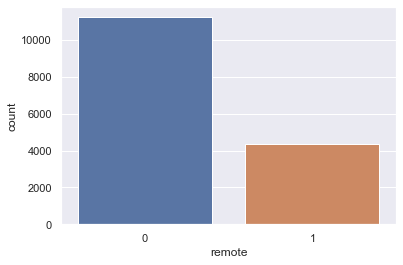

In [8]:
sns.countplot(x='remote', data=data_clean)
plt.show()

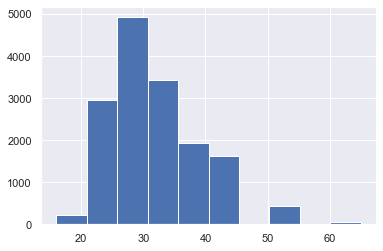

In [9]:
data_clean['age_midpoint'].hist()
plt.show()

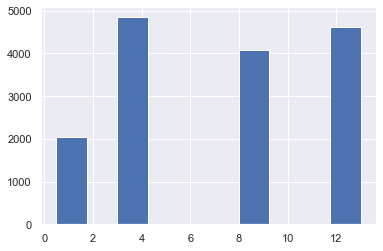

In [10]:
data_clean['experience_midpoint'].hist()
plt.show()

# Oversampling

In [11]:
X = data_clean.loc[:, data_clean.columns != 'remote']
y = data_clean.loc[:, data_clean.columns == 'remote']

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=0)
columns = X_train.columns

In [12]:
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['remote'])

print("Length of oversampled data is ",len(os_data_X))
print("Number of non-remote devs in oversampled data",len(os_data_y[os_data_y['remote']==0]))
print("Number of remote devs",len(os_data_y[os_data_y['remote']==1]))
print("Proportion of non-remote devs in oversampled data is ",len(os_data_y[os_data_y['remote']==0])/len(os_data_X))
print("Proportion of remote devs in oversampled data is ",len(os_data_y[os_data_y['remote']==1])/len(os_data_X))

Length of oversampled data is  15712
Number of non-remote devs in oversampled data 7856
Number of remote devs 7856
Proportion of non-remote devs in oversampled data is  0.5
Proportion of remote devs in oversampled data is  0.5


# Implementing and testing the model

In [13]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.597425
         Iterations 5
                           Results: Logit
Model:               Logit             Pseudo R-squared:  -0.009    
Dependent Variable:  remote            AIC:               18634.9177
Date:                2020-03-08 10:02  BIC:               18657.8811
No. Observations:    15591             Log-Likelihood:    -9314.5   
Df Model:            2                 LL-Null:           -9228.2   
Df Residuals:        15588             LLR p-value:       1.0000    
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      5.0000                                         
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
age_midpoint        -0.0564   0.0016 -35.5591 0.0000 -0.0595 -0.0533
experience_midpoint  0.1085 

In [17]:
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
y_pred = logreg.predict(X_test)
print(f'Accuracy of logistic regression classifier on test set: {logreg.score(X_test, y_test)}')

Accuracy of logistic regression classifier on test set: 0.7235998289867465


# Metrics

## Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[3385    2]
 [1291    0]]


## Classification report

* Precisão: Habilidade de não classificar um sample como positivo se ele for negativo
* Recall: Habilidade de encontrar todos os samples positivos
* F-beta score: Média ponderada harmônica de precisão e recall. Vai de 0(pior) a 1(melhor).

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84      3387
           1       0.00      0.00      0.00      1291

    accuracy                           0.72      4678
   macro avg       0.36      0.50      0.42      4678
weighted avg       0.52      0.72      0.61      4678



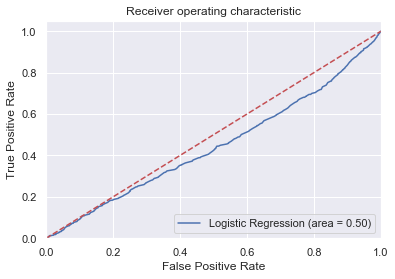

In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

O ideal do ROC seria ficar mais longe possível da linha tracejada, visto que ela sinaliza um classificador totalmente randômico.